In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from ensemble.sgh import SGH
from deslib.static.oracle import Oracle
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier, Perceptron
from tqdm import tqdm
import pandas as pd
import numpy as np
import utils

plt.style.use('ggplot')

ds_name, X, y = utils.data_digits()
seed = 100000
base_learner = Perceptron()
kf = KFold(n_splits=5)
results = {'oracle_accuracy': [], 'oracle_std': [], 'ensemble_length': []}

"""
 - verifique quantas instâncias por classe foram incorretamente classificadas; 
 - verifique quantos hiperplanos por classe foram gerados
"""

pool_classifiers = SGH(base_estimator=base_learner)
scores = list()
fold = 1
for train_index, test_index in kf.split(X):
    #print("Fold %d" % fold)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    pool_classifiers.fit(X_train, y_train)
    
    
    oracle = Oracle(pool_classifiers, random_state=seed)
    oracle.fit(X_train, y_train)
    
    
    score = oracle.score(X_test, y_test)
    scores.append(score)
    fold += 1
    
print("Acc (mean): %.2f" % np.mean(scores))
print("STD: %.2f" % np.std(scores))

Acc (mean): 1.00
STD: 0.00


In [88]:
misclassified = pd.DataFrame(np.mean(pool_classifiers.misclassified_data_frames, axis=0))
misclassified['labels'] = misclassified.index
misclassified.columns = ['H_%s' % it for it in misclassified.columns[:-1]] + [misclassified.columns[-1]]
misclassified

,H_0,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,labels
0,142.4,142.4,142.4,142.4,142.4,142.4,142.4,142.4,1.2,0
1,145.6,145.6,8.0,30.2,30.2,30.2,141.6,3.2,1.2,1
2,141.6,141.6,141.6,113.4,113.4,113.4,1.8,1.2,0.0,2
3,146.4,30.6,30.6,59.0,59.0,1.6,1.4,1.2,0.0,3
4,144.8,144.8,144.8,144.8,116.6,1.4,0.8,0.0,0.0,4
5,145.6,145.6,145.6,146.0,29.6,0.6,0.0,0.0,0.0,5
6,144.8,144.4,144.4,143.8,86.4,0.8,0.0,0.0,0.0,6
7,143.2,142.2,117.0,86.8,0.8,0.0,0.0,0.0,0.0,7
8,139.2,112.0,8.4,0.8,0.0,0.0,0.0,0.0,0.0,8
9,144.0,1.2,1.2,0.0,0.0,0.0,0.0,0.0,0.0,9


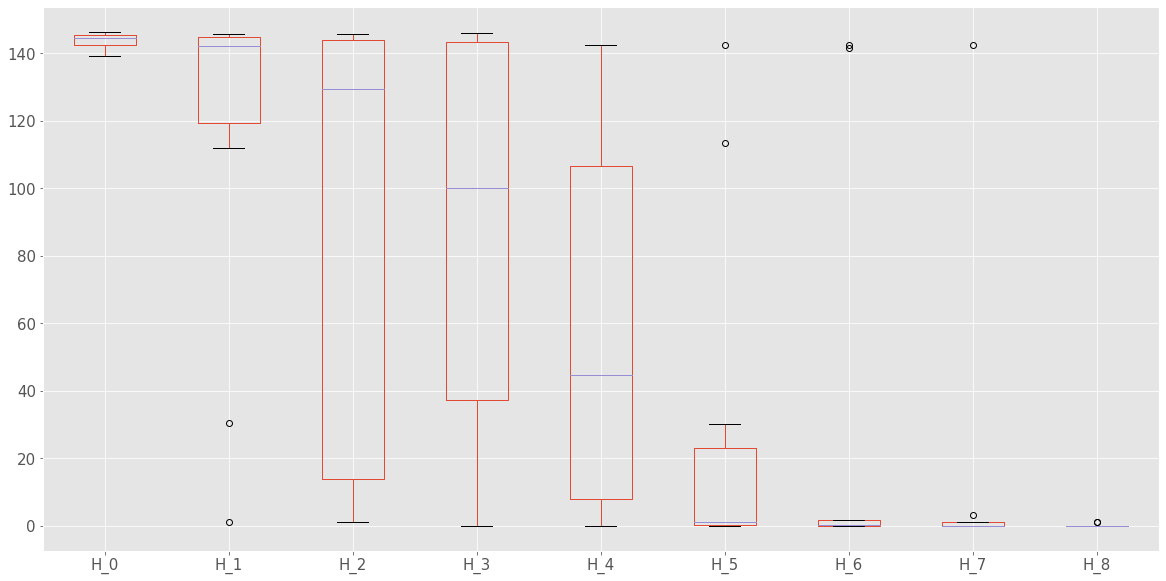

In [89]:
misclassified.iloc[:, :-1].boxplot(figsize=(20,10), grid=True, fontsize=15)

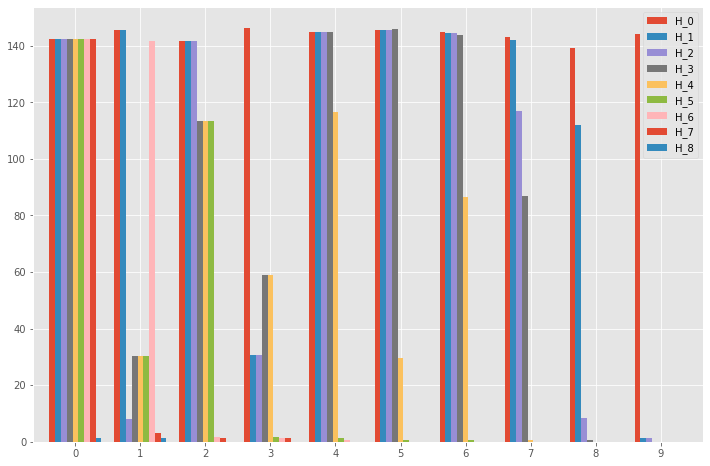

In [93]:
misclassified.iloc[:, :-1].plot(kind='bar', width=.80, figsize=(12,8), rot=0)

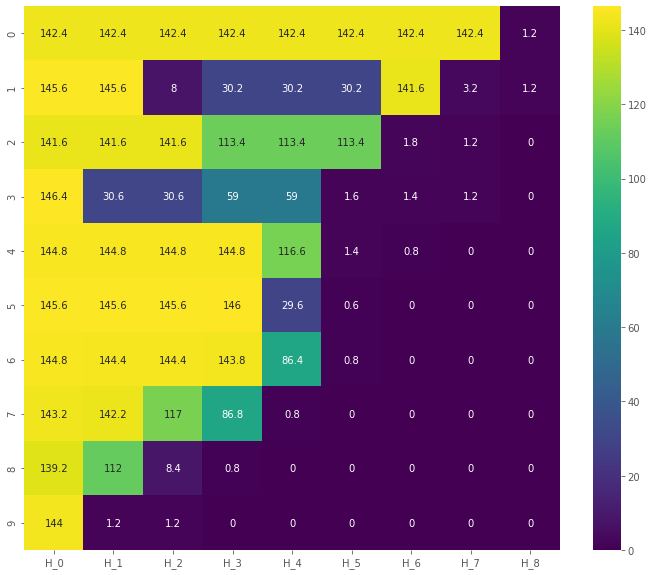

In [94]:
plt.figure(figsize=(12,10))
sns.heatmap(misclassified.iloc[:, :-1], annot=True, fmt="g", cmap='viridis')
plt.show()